Importing Libraries

In [4]:
# import libraries 
import pandas as pd # data manipulation in dataframes
import numpy as np # statistical analysis 
import matplotlib.pyplot as plt # data visualisation
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split # to split train data into train and validation
import itertools
import random
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard



%matplotlib inline
sns.set_style("whitegrid")

Loading the Dataset

In [5]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('../data/raw/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('../data/raw/fashion-mnist_test.csv', sep = ',')

In [6]:
# converting the dataframes into numpy array for ease of ploting the image and passing into the models

train_labels = fashion_train_df.iloc[:, 0].to_numpy()
train_features = fashion_train_df.iloc[:, 1:].to_numpy()
test_labels = fashion_test_df.iloc[:, 0].to_numpy()
test_features = fashion_test_df.iloc[:, 1:].to_numpy()

Splitting data into Train and Validation

In [7]:
# spliting train data into train and validation

train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=10000, random_state=42)

In [8]:
# shape and head of train data
print(train_features.shape)

(50000, 784)


In [9]:
# shape and head of validation data
print(val_features.shape)

(10000, 784)


In [10]:
# shape and head of test data
print(test_features.shape)

(10000, 784)


In [11]:
# Data labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

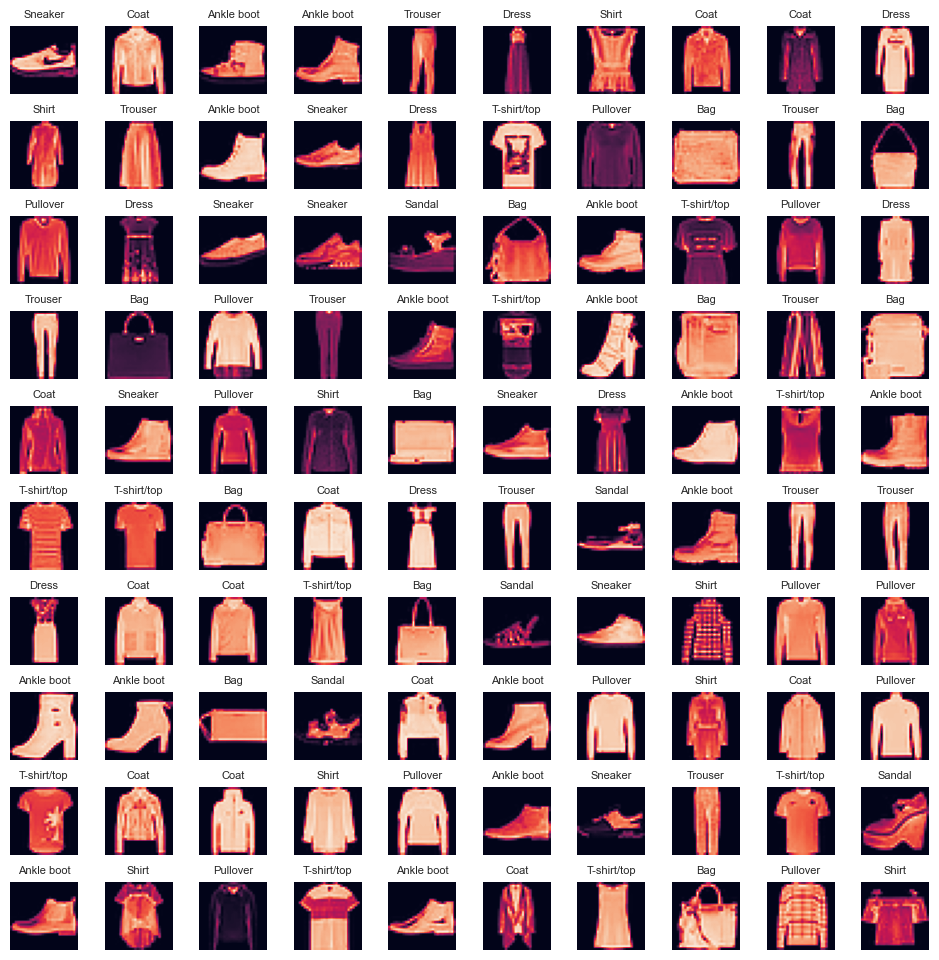

In [12]:
# Printing sample training images
fig, axes = plt.subplots(10, 10, figsize=(12,12)) # Length and Width of plot
axes = axes.ravel()
for i in np.arange(0, 10 * 10): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, 50000)
    # read and display an image with the selected index    
    axes[i].imshow( train_features[index,:].reshape((28,28)) )
    label_index = int(train_labels[index])
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Range Normalization

In [13]:
# scaling the values of the intensity of the pixels from 0 to 1 instead of 0 to 255

train_features = train_features/255
test_features = test_features/255
val_features = val_features/255

In [14]:
# reshaping the images
train_features = train_features.reshape(train_features.shape[0], * (28, 28, 1))
test_features = test_features.reshape(test_features.shape[0], * (28, 28, 1))
val_features = val_features.reshape(val_features.shape[0], * (28, 28, 1))

### 1st CNN Model with architecture from CNN documentation in Tensorflow

Reference:

https://www.tensorflow.org/tutorials/images/cnn

In [34]:
# Architecture with 3 Convulation Layers

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # output shape:  (None, 26, 26, 32) 
cnn.add(MaxPooling2D((2, 2)))   #  (None, 13, 13, 32)
cnn.add(Conv2D(64, (3, 3), activation='relu'))  #  (None, 11, 11, 64)
cnn.add(MaxPooling2D((2, 2)))   #  (None, 5, 5, 64)
cnn.add(Conv2D(64, (3, 3), activation='relu'))  # (None, 3, 3, 64)

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [36]:
# Flattening the image shape and applying dense layer to get the output shape (None, 10)

cnn.add(Flatten())  # Output shape: (None, 576) 
cnn.add(Dense(64, activation='relu'))   # (None, 64)
cnn.add(Dense(10, activation='softmax'))    # (None, 10) 

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [38]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

Training

In [39]:
# Defining the hyperparameters

epochs = 10
batch_size = 512

# training the model

history = cnn.fit(
    train_features, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(val_features, val_labels)
)

Epoch 1/10
98/98 [==============================] - 13s 122ms/step - loss: 0.9155 - accuracy: 0.6962 - val_loss: 0.5971 - val_accuracy: 0.7737
Epoch 2/10
98/98 [==============================] - 14s 144ms/step - loss: 0.5137 - accuracy: 0.8108 - val_loss: 0.4520 - val_accuracy: 0.8361
Epoch 3/10
98/98 [==============================] - 14s 147ms/step - loss: 0.4309 - accuracy: 0.8443 - val_loss: 0.4061 - val_accuracy: 0.8534
Epoch 4/10
98/98 [==============================] - 14s 144ms/step - loss: 0.3870 - accuracy: 0.8624 - val_loss: 0.3662 - val_accuracy: 0.8687
Epoch 5/10
98/98 [==============================] - 14s 141ms/step - loss: 0.3551 - accuracy: 0.8751 - val_loss: 0.3432 - val_accuracy: 0.8774
Epoch 6/10
98/98 [==============================] - 14s 141ms/step - loss: 0.3324 - accuracy: 0.8814 - val_loss: 0.3411 - val_accuracy: 0.8780
Epoch 7/10
98/98 [==============================] - 15s 158ms/step - loss: 0.3139 - accuracy: 0.8880 - val_loss: 0.3334 - val_accuracy: 0.8790

In [40]:
# Evaluating the model on test set

evaluation = cnn.evaluate(test_features, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.2866 - accuracy: 0.8985
Test Accuracy : 0.899


Interpretebility of CNN

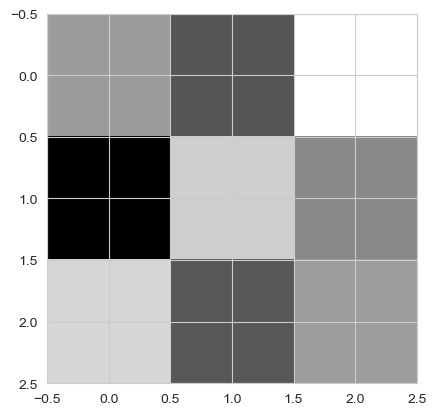

In [91]:
layer_weights = cnn.layers[4].get_weights()[0] # Weights of last convulation layer
plt.imshow(layer_weights[:, :, 0, 0], cmap='gray')  # Visualizing the filter in the 4th layer
plt.show()

1/1 [==============================] - 0s 33ms/step


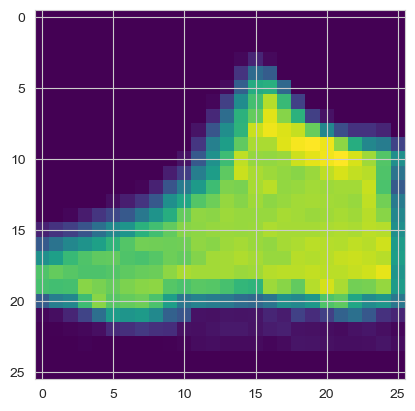

In [104]:
# Activation map of 1st Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn.input, outputs=cnn.layers[0].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 38ms/step


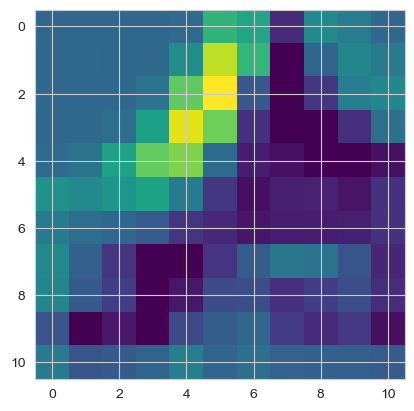

In [115]:
# Activation map of 2nd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn.input, outputs=cnn.layers[2].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()



1/1 [==============================] - 0s 33ms/step


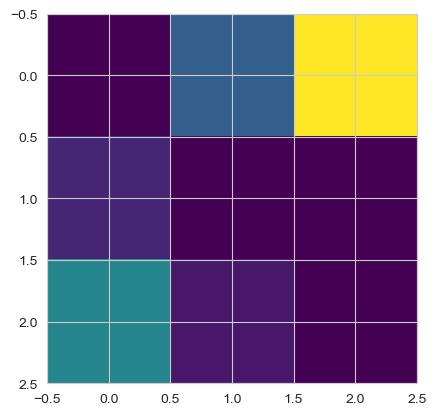

In [116]:
# Activation map of 3rd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn.input, outputs=cnn.layers[4].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()


### 2nd CNN Model with more complex architecture

In [55]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))    # Output shape: (None, 26, 26, 32)
cnn2.add(BatchNormalization())
cnn2.add(Conv2D(64, (3, 3), activation='relu')) # (None, 24, 24, 64)
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D((2, 2)))  # (None, 12, 12, 64)
cnn2.add(Dropout(0.25))
cnn2.add(Conv2D(64, (3, 3), activation='relu')) # (None, 10, 10, 64)
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.25))
cnn2.add(Conv2D(64, (3, 3), activation='relu'))  # (None, 8, 8, 64)
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(2, 2)))  # (None, 4, 4, 64)
cnn2.add(Dropout(0.25))

In [56]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [57]:
cnn2.add(Flatten()) # (None, 1024)
cnn2.add(Dense(64, activation='relu'))  # (None, 64)
cnn2.add(Dense(10, activation='softmax'))   # (None, 10)

In [112]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [58]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [59]:
# Defining hyperparameters
epochs = 10
batch_size = 512

# training the model
history = cnn2.fit(
    train_features, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(val_features, val_labels)
)

Epoch 1/10
98/98 [==============================] - 58s 571ms/step - loss: 0.6606 - accuracy: 0.7615 - val_loss: 3.2737 - val_accuracy: 0.0999
Epoch 2/10
98/98 [==============================] - 62s 634ms/step - loss: 0.4002 - accuracy: 0.8523 - val_loss: 3.4828 - val_accuracy: 0.2654
Epoch 3/10
98/98 [==============================] - 66s 671ms/step - loss: 0.3327 - accuracy: 0.8786 - val_loss: 4.0381 - val_accuracy: 0.2160
Epoch 4/10
98/98 [==============================] - 61s 627ms/step - loss: 0.3031 - accuracy: 0.8887 - val_loss: 1.9266 - val_accuracy: 0.5572
Epoch 5/10
98/98 [==============================] - 62s 634ms/step - loss: 0.2786 - accuracy: 0.8977 - val_loss: 1.0252 - val_accuracy: 0.6835
Epoch 6/10
98/98 [==============================] - 61s 626ms/step - loss: 0.2580 - accuracy: 0.9056 - val_loss: 0.4568 - val_accuracy: 0.8364
Epoch 7/10
98/98 [==============================] - 62s 635ms/step - loss: 0.2467 - accuracy: 0.9101 - val_loss: 0.2585 - val_accuracy: 0.9073

In [60]:
# Evaluating the modell on test dataset

evaluation = cnn2.evaluate(test_features, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 4s 11ms/step - loss: 0.2082 - accuracy: 0.9261
Test Accuracy : 0.926


Interpretebility

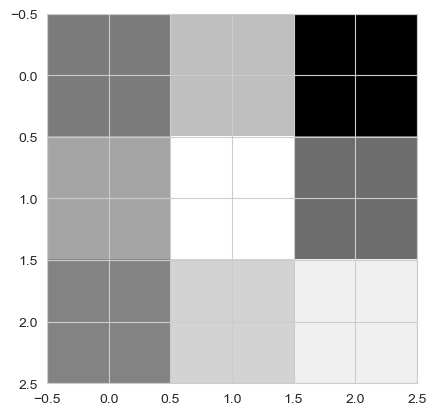

In [113]:
layer_weights = cnn2.layers[9].get_weights()[0] # Weights of last convulation layer
plt.imshow(layer_weights[:, :, 0, 0], cmap='gray')  # Visualizing the filter in the 4th layer
plt.show()

1/1 [==============================] - 0s 29ms/step


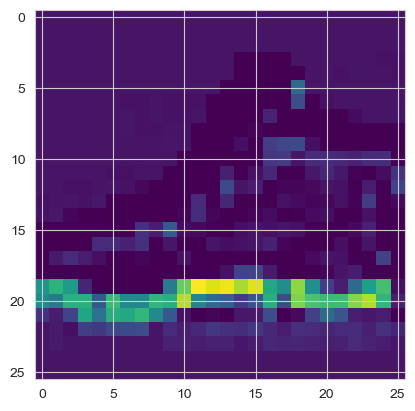

In [114]:
# Activation map of 1st Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn2.input, outputs=cnn2.layers[0].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 43ms/step


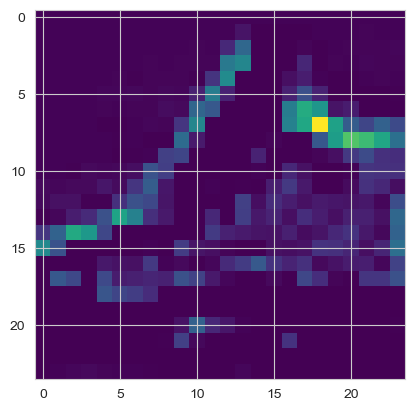

In [117]:
# Activation map of 2nd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn2.input, outputs=cnn2.layers[2].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 84ms/step


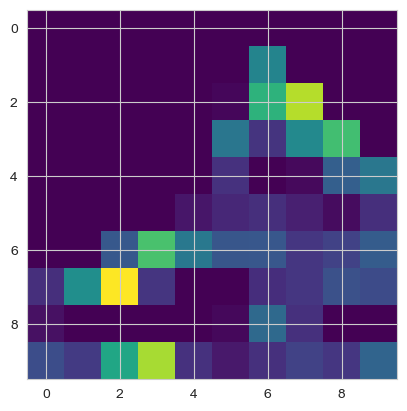

In [118]:
# Activation map of 3rd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn2.input, outputs=cnn2.layers[6].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 92ms/step


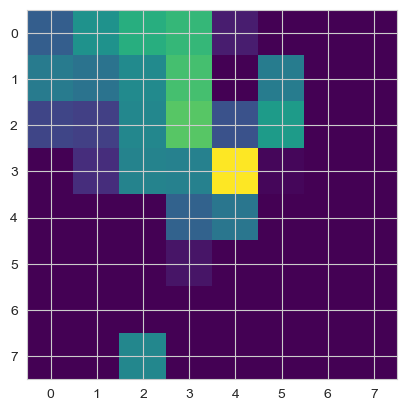

In [119]:
# Activation map of 4th Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn2.input, outputs=cnn2.layers[9].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

### 3rd Architechture of CNN

The 4th convulation layer didn't seem to be activating right parts of images so We can try with another architecture of CNN layers with 4th convulation layer removed.
Also, with 10 epochs, we can see that model was still learning when we stopped and wasn't overfitting. So, we can tune hyperparameter and increase the number of epochs to 25.

In [15]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))    # Output shape: (None, 26, 26, 32)
cnn3.add(BatchNormalization())
cnn3.add(Conv2D(64, (3, 3), activation='relu')) # (None, 24, 24, 64)
cnn3.add(BatchNormalization())
cnn3.add(MaxPooling2D((2, 2)))  # (None, 12, 12, 64)
cnn3.add(Dropout(0.25))
cnn3.add(Conv2D(64, (3, 3), activation='relu')) # (None, 10, 10, 64)
cnn3.add(BatchNormalization())
cnn3.add(MaxPooling2D(pool_size=(2, 2)))  # (None, 4, 4, 64)
cnn3.add(Dropout(0.25))

In [16]:
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [17]:
cnn3.add(Flatten()) # (None, 1024)
cnn3.add(Dense(64, activation='relu'))  # (None, 64)
cnn3.add(Dense(10, activation='softmax'))   # (None, 10)

In [18]:
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [19]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn3.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [20]:
# Defining hyperparameters
epochs = 25
batch_size = 512

# training the model
history = cnn3.fit(
    train_features, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(val_features, val_labels)
)

Epoch 1/25
98/98 [==============================] - 61s 613ms/step - loss: 0.6106 - accuracy: 0.7812 - val_loss: 5.0654 - val_accuracy: 0.0999
Epoch 2/25
98/98 [==============================] - 62s 629ms/step - loss: 0.3651 - accuracy: 0.8651 - val_loss: 4.9153 - val_accuracy: 0.0999
Epoch 3/25
98/98 [==============================] - 76s 782ms/step - loss: 0.3092 - accuracy: 0.8875 - val_loss: 3.3605 - val_accuracy: 0.1817
Epoch 4/25
98/98 [==============================] - 414s 4s/step - loss: 0.2721 - accuracy: 0.9014 - val_loss: 2.2457 - val_accuracy: 0.3872
Epoch 5/25
98/98 [==============================] - 398s 4s/step - loss: 0.2486 - accuracy: 0.9089 - val_loss: 1.5317 - val_accuracy: 0.6451
Epoch 6/25
98/98 [==============================] - 60s 609ms/step - loss: 0.2313 - accuracy: 0.9159 - val_loss: 0.5708 - val_accuracy: 0.7990
Epoch 7/25
98/98 [==============================] - 52s 535ms/step - loss: 0.2198 - accuracy: 0.9193 - val_loss: 0.2667 - val_accuracy: 0.9012
Epo

In [21]:
# Evaluating the modell on test dataset

evaluation = cnn3.evaluate(test_features, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 4s 13ms/step - loss: 0.2247 - accuracy: 0.9312
Test Accuracy : 0.931


Text(0.5, 1.0, 'Accuracy evolution')

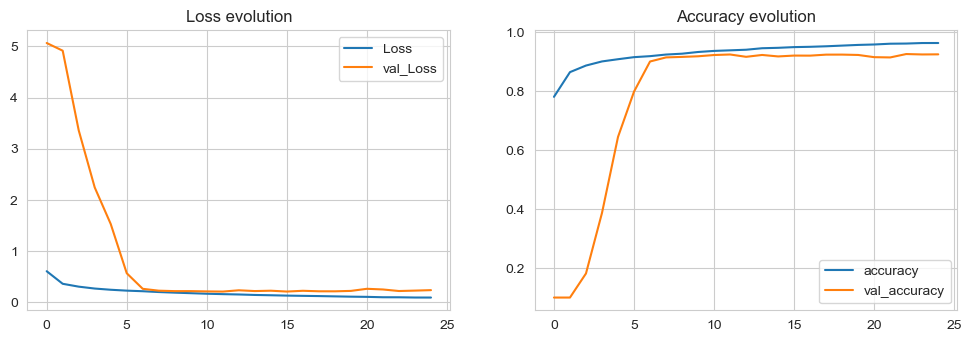

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

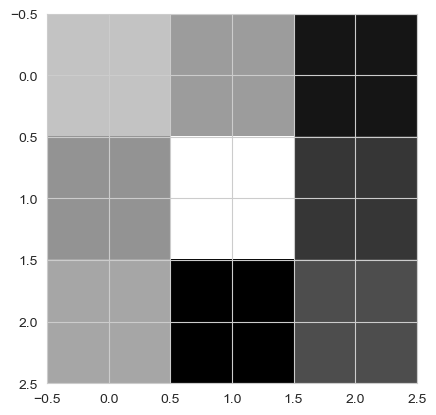

In [22]:
layer_weights = cnn3.layers[6].get_weights()[0] # Weights of last convulation layer
plt.imshow(layer_weights[:, :, 0, 0], cmap='gray')  # Visualizing the filter in the 4th layer
plt.show()

1/1 [==============================] - 0s 147ms/step


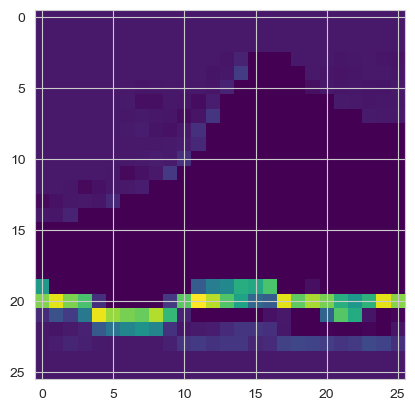

In [23]:
# Activation map of 1st Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn3.input, outputs=cnn3.layers[0].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 114ms/step


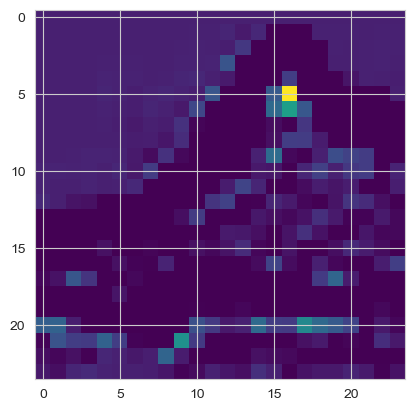

In [24]:
# Activation map of 2nd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn3.input, outputs=cnn3.layers[2].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

1/1 [==============================] - 0s 88ms/step


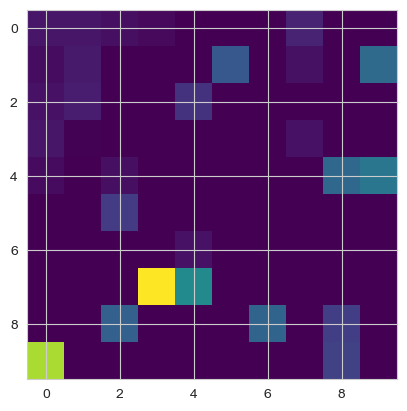

In [25]:
# Activation map of 3rd Convulation Layer

activation_model = tf.keras.models.Model(inputs=cnn3.input, outputs=cnn3.layers[6].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

Saving the trained model from CNN

In [26]:
temp = cnn3
temp.save('model_cnn3.h5')

C:\Users\archi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
